In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [3]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(109,)

In [4]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(109, 50, 50)

In [5]:
imgs = np.expand_dims(imgs, -1)

In [6]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [7]:

batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),  # ⬅️ changed from 256 to 32
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),  # ⬅️ changed from 512 to 64
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),                 # ⬅️ added a small Dense
    layers.Dense(len(ENCODER)+1, activation='softmax')    # ⬅️ same
])

In [8]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [9]:

model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0151 - loss: 3.3043 - val_accuracy: 0.1071 - val_loss: 3.1967
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3953 - loss: 2.9157 - val_accuracy: 0.1429 - val_loss: 3.0926
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4469 - loss: 2.3464 - val_accuracy: 0.0714 - val_loss: 3.2509
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4685 - loss: 1.8775 - val_accuracy: 0.2143 - val_loss: 3.1003
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7014 - loss: 1.2159 - val_accuracy: 0.2143 - val_loss: 3.2273
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7869 - loss: 0.7481 - val_accuracy: 0.2143 - val_loss: 3.5927
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8519 - loss: 0.5256 - val_accuracy: 0.1786 - val_loss: 4.0819
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8967 - loss: 0.4305 - val_accuracy: 0.2143 - val_loss: 4.0315


In [10]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [11]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

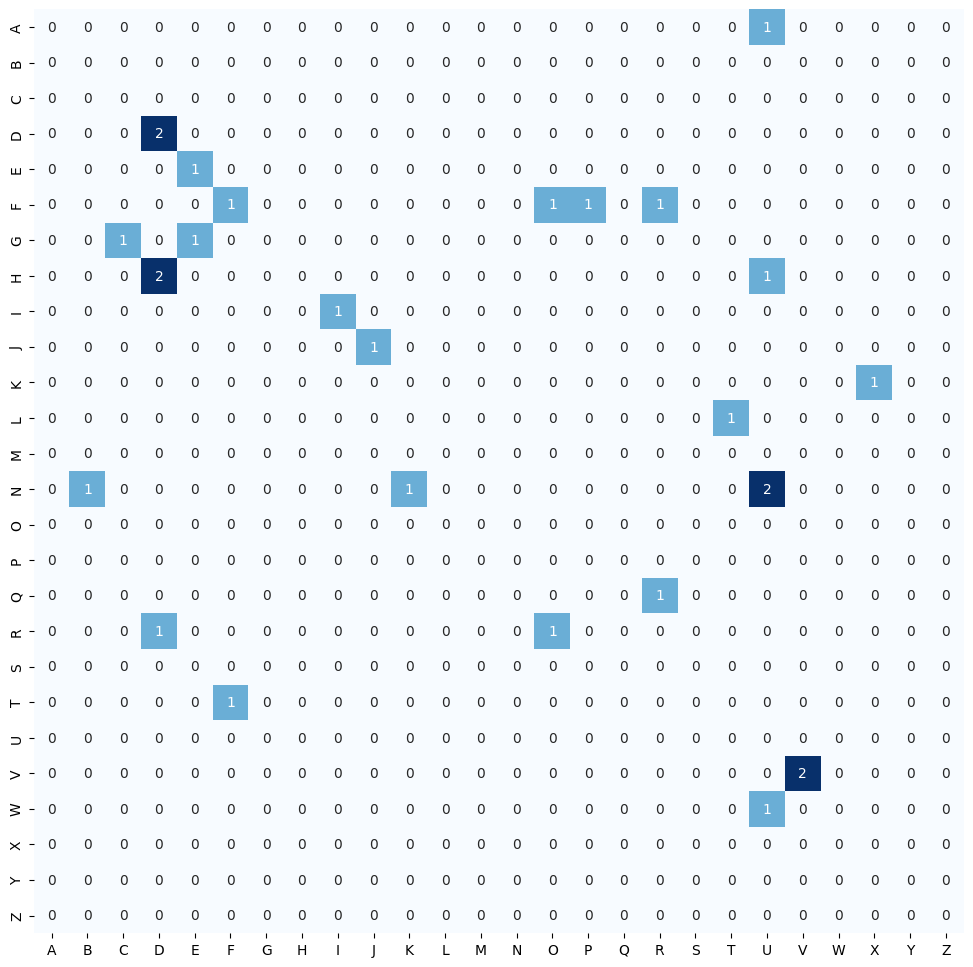

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [13]:
model.save('../letter.keras')